In [102]:
# Imports

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 10)

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')


In [103]:
# loading dataset

df= pd.read_csv('datasets/cluster_scraped.csv')
df.rename(columns = {'gdp-per-capita':'gdp'}, inplace = True)

In [104]:
df = df[~df['digestive_disease'].isnull()]

In [105]:
data = df.copy()

In [106]:
data.head()

,country,code,year,number_of_executions,meningitis,neoplasms,fire_heat_hot_substances,malaria,drowing,interpersonal_violence,...,chronic_kidney_disease,chronic_respiratory_deasease,cirrohosis_liver_deasease,digestive_disease,acute_hepatitis,alzhimers_disease,parkinsons_disease,PopTotal,gdp,continent
0,Afghanistan,AFG,2007,15,0.108210,0.587619,0.017757,0.014499,0.078478,0.134950,...,0.165686,0.266481,0.123459,0.238289,0.126824,0.051733,0.016605,27100.542,0.053904,Asia
1,Afghanistan,AFG,2008,17,0.098507,0.582486,0.016672,0.009188,0.071184,0.136522,...,0.163544,0.257655,0.119628,0.231149,0.108397,0.051367,0.016413,27722.281,0.053535,Asia
2,Afghanistan,AFG,2009,0,0.086642,0.576956,0.015788,0.008418,0.065229,0.136437,...,0.161895,0.248118,0.115907,0.223915,0.093785,0.051030,0.016200,28394.806,0.061945,Asia
3,Afghanistan,AFG,2011,2,0.077257,0.567563,0.014871,0.012951,0.058935,0.138454,...,0.158866,0.229620,0.110165,0.211506,0.078526,0.050071,0.015705,30117.411,0.063238,Asia
4,Afghanistan,AFG,2012,14,0.072349,0.562296,0.014288,0.003013,0.055064,0.136216,...,0.155502,0.220706,0.107596,0.205324,0.072654,0.049549,0.015468,31161.378,0.066605,Asia


## Missing value treatment

In [107]:
# replacing missing value in gdp with nan value
data.gdp.fillna(data.gdp.mean(), inplace = True)

In [110]:
data.shape

(5670, 39)

In [111]:
data.isnull().sum()

country                            0
code                               0
year                               0
number_of_executions            5454
meningitis                         0
neoplasms                          0
fire_heat_hot_substances           0
malaria                            0
drowing                            0
interpersonal_violence             0
hiv_aids                           0
drug_use_disorders                 0
tuberculosis                       0
road_injuries                      0
maternal_disorders                 0
lower_respiratory_infection        0
neonatal_disorder                  0
alcohol_use_disorders              0
force_of_nature                    0
diarrheal                          0
environmental_heat_cold            0
nutritional_deficiencies           0
self_harm                          0
conflict_and_terrorism             0
diabetes_mellitus                  0
poisoning                          0
protein_energy_malnutrition        0
t

-------------------------

## KMeans Clustering

In [112]:
X = data.drop(columns=['country', 'year', 'code','continent','number_of_executions','terrorism','PopTotal'])
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [113]:
from scipy.spatial.distance import cdist, pdist

Number of Clusters: 1 	Average Distortion: 4.973159647483428
Number of Clusters: 2 	Average Distortion: 4.380866961908015
Number of Clusters: 3 	Average Distortion: 4.030679971976047
Number of Clusters: 4 	Average Distortion: 3.7951079601385023
Number of Clusters: 5 	Average Distortion: 3.639718200900203
Number of Clusters: 6 	Average Distortion: 3.504049306075151
Number of Clusters: 7 	Average Distortion: 3.4906648523068884
Number of Clusters: 8 	Average Distortion: 3.392086328183328


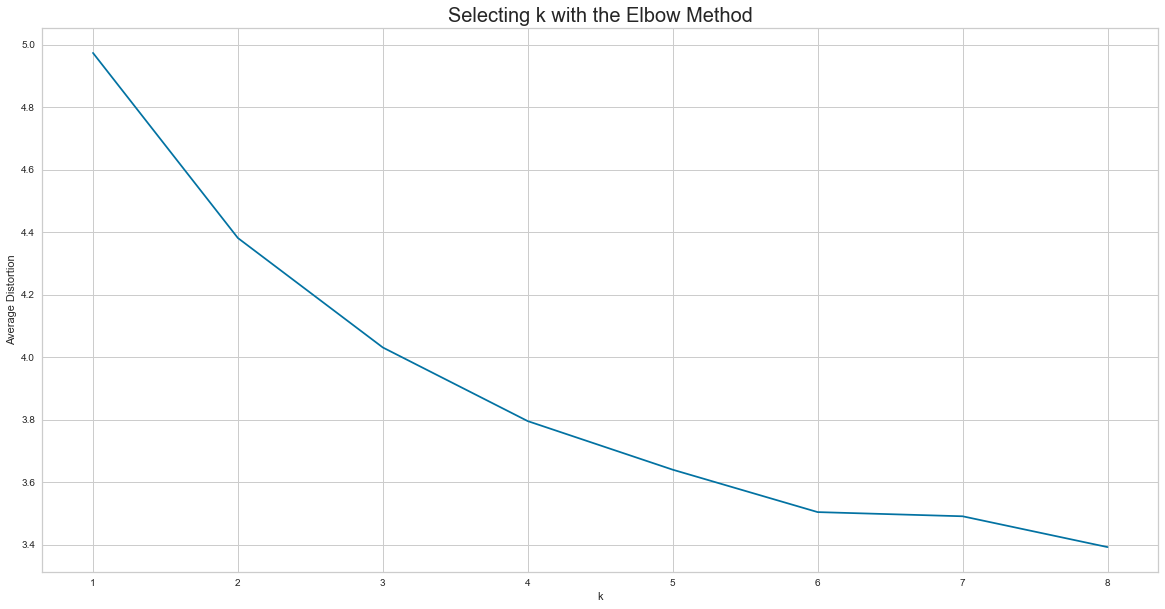

In [ ]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(X_sc)
    prediction = model.predict(X_sc)
    distortion = (
        sum(np.min(cdist(X_sc, model.cluster_centers_, "euclidean"), axis=1))
        / X_sc.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

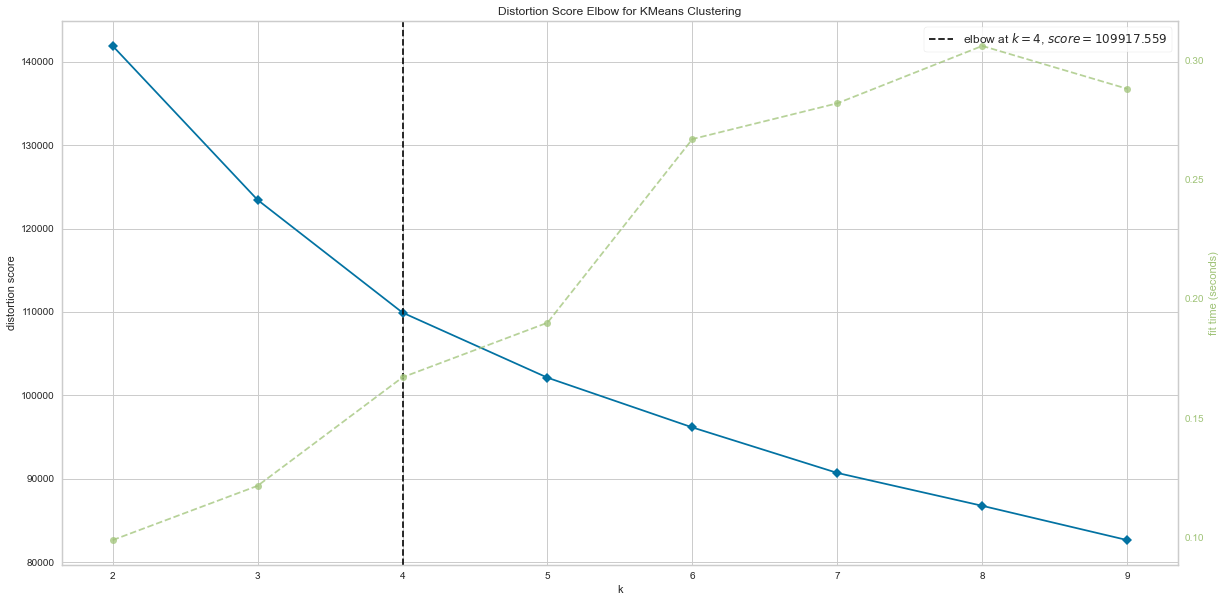

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(X_sc)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

In [ ]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=4, random_state=42)

In [ ]:
km.cluster_centers_;

In [100]:
df['cluster'] = km.labels_
df.head()

,country,code,year,number_of_executions,meningitis,neoplasms,fire_heat_hot_substances,malaria,drowing,interpersonal_violence,...,chronic_respiratory_deasease,cirrohosis_liver_deasease,digestive_disease,acute_hepatitis,alzhimers_disease,parkinsons_disease,PopTotal,gdp,continent,cluster
0,Afghanistan,AFG,2007,15,0.108210,0.587619,0.017757,0.014499,0.078478,0.134950,...,0.266481,0.123459,0.238289,0.126824,0.051733,0.016605,27100.542,0.053904,Asia,0
1,Afghanistan,AFG,2008,17,0.098507,0.582486,0.016672,0.009188,0.071184,0.136522,...,0.257655,0.119628,0.231149,0.108397,0.051367,0.016413,27722.281,0.053535,Asia,3
2,Afghanistan,AFG,2009,0,0.086642,0.576956,0.015788,0.008418,0.065229,0.136437,...,0.248118,0.115907,0.223915,0.093785,0.051030,0.016200,28394.806,0.061945,Asia,3
3,Afghanistan,AFG,2011,2,0.077257,0.567563,0.014871,0.012951,0.058935,0.138454,...,0.229620,0.110165,0.211506,0.078526,0.050071,0.015705,30117.411,0.063238,Asia,3
4,Afghanistan,AFG,2012,14,0.072349,0.562296,0.014288,0.003013,0.055064,0.136216,...,0.220706,0.107596,0.205324,0.072654,0.049549,0.015468,31161.378,0.066605,Asia,3


In [75]:
df.cluster.value_counts()

3    3036
1    1345
0     981
2     308
Name: cluster, dtype: int64

In [76]:
cluster = df[['cluster', 'country']]

In [235]:
a = []
for i in cluster.cluster:
    if i ==3:
        a.append('Excelient')
    elif i == 2:
        a.append('bad')
    elif i == 0:
        a.append('fair')
    else:
        a.append('good')
 

In [236]:
cluster.cluster = a

In [237]:
cluster.cluster.value_counts()

Excelient    3036
good         1345
fair          981
bad           308
Name: cluster, dtype: int64

In [238]:
cluster.to_csv('datasets/cluster.csv', index = False)

In [212]:
a = df.groupby('cluster').mean().T

In [223]:
a.columns.i

Int64Index([0, 1, 2, 3], dtype='int64', name='cluster')

In [225]:
#a.to_csv('datasets/cl.csv')

In [231]:
aa = pd.read_csv('datasets/cl.csv')


In [232]:
aa.describe()

,one,two,three,four
count,32.000000,32.000000,32.000000,32.000000
mean,0.365935,0.289838,0.369008,0.195360
std,0.448708,0.816653,1.140883,0.375380
min,0.002037,0.000003,0.000000,0.004206
25%,0.037082,0.006383,0.016438,0.020919
50%,0.176468,0.020646,0.083052,0.071524
75%,0.421300,0.185781,0.205223,0.206508
max,1.380609,4.047814,6.286386,2.021019


based on this data we can say 4 is good countries and worst countries are in three,  in mid value two and one

In [125]:
# comparision of numerical representations of clusters means
df.groupby('cluster').mean().T

cluster,0,1,2,3
year,2001.272171,2005.879554,2003.827922,2005.000000
meningitis,0.281881,0.005868,0.019845,0.032158
neoplasms,0.528793,2.494204,2.072680,0.859401
fire_heat_hot_substances,0.033672,0.013358,0.071573,0.021493
malaria,0.971931,0.000003,0.000000,0.055535
drowing,0.057307,0.019234,0.101877,0.051939
interpersonal_violence,0.080201,0.028535,0.160964,0.097483
hiv_aids,1.249671,0.021792,0.044267,0.223146
drug_use_disorders,0.002037,0.018707,0.033812,0.005373
tuberculosis,0.762281,0.019501,0.117707,0.124774


In [126]:
columns = df.columns.drop(['country', 'cluster', 'year','continent', 'code'])

In [127]:
km.cluster_centers_;

In [206]:
df.shape

(5670, 43)

In [207]:
a = df.copy()

In [208]:
a.drop(columns = ['year','gdp', 'PopTotal'], inplace = True)

<AxesSubplot:xlabel='cluster'>

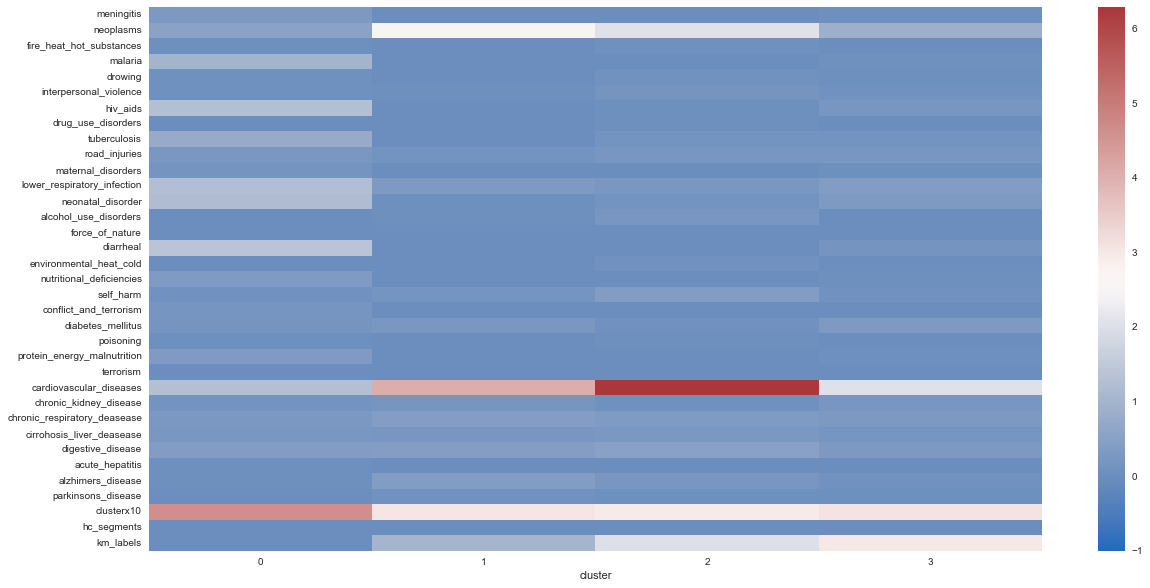

In [211]:
sns.heatmap(a.groupby('cluster').mean().T,vmin = -1, cmap = 'vlag')

based on this data we can say 0 countries are better 

In [133]:
sil_score = []
cluster_list = range(2, 11)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((X_sc))
    score = silhouette_score(X_sc, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.31100479019400334)
For n_clusters = 3, the silhouette score is 0.2195635217978494)
For n_clusters = 4, the silhouette score is 0.21251948206025903)
For n_clusters = 5, the silhouette score is 0.20082482526076914)
For n_clusters = 6, the silhouette score is 0.1816139166302267)
For n_clusters = 7, the silhouette score is 0.18252246160708557)
For n_clusters = 8, the silhouette score is 0.1841441110487749)
For n_clusters = 9, the silhouette score is 0.18915701359330328)
For n_clusters = 10, the silhouette score is 0.1997164794998166)


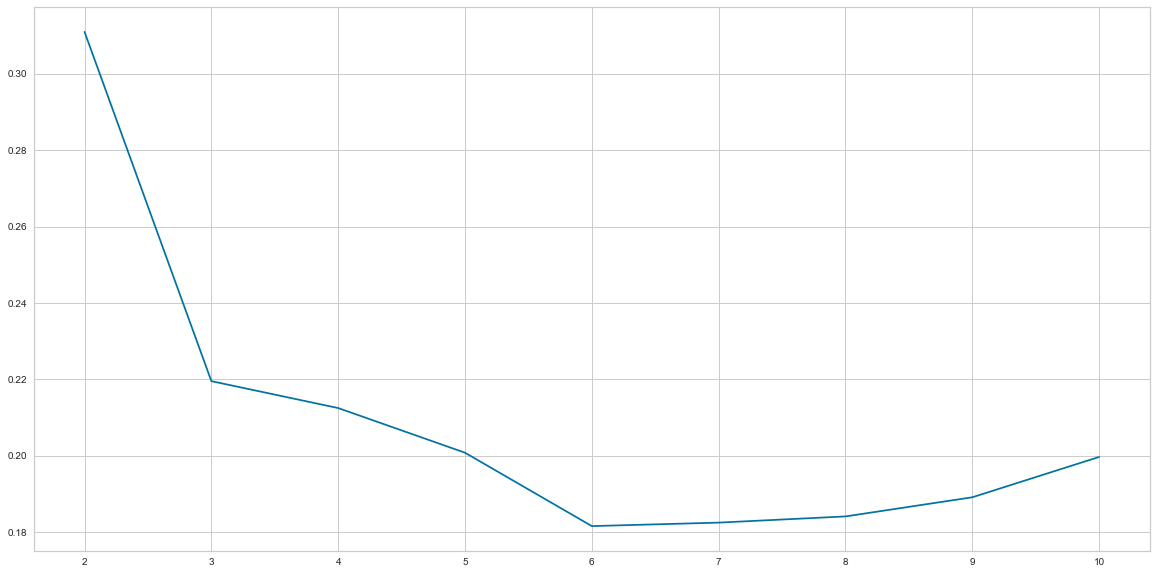

In [134]:
plt.plot(cluster_list, sil_score)
plt.show()

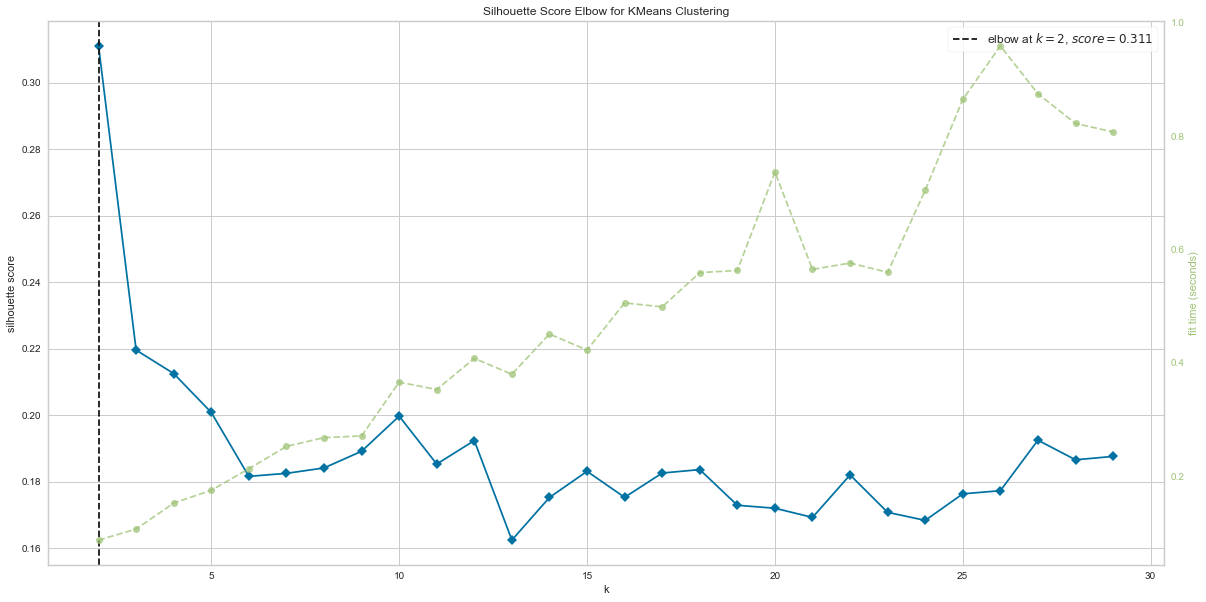

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [135]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 30), metric="silhouette", timings=True)
visualizer.fit(X_sc)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

In [138]:
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [139]:
score_df.head(11)

,k,inertia,silhouette
0,2,141919.980735,0.311005
1,3,123441.595470,0.219564
2,4,109917.559196,0.212519
3,5,102113.643812,0.200825
4,6,96146.685198,0.185269
5,7,90687.880356,0.186846
6,8,86884.019024,0.185724
7,9,81646.561475,0.179340
8,10,79806.838850,0.191165
9,11,75133.192774,0.155975


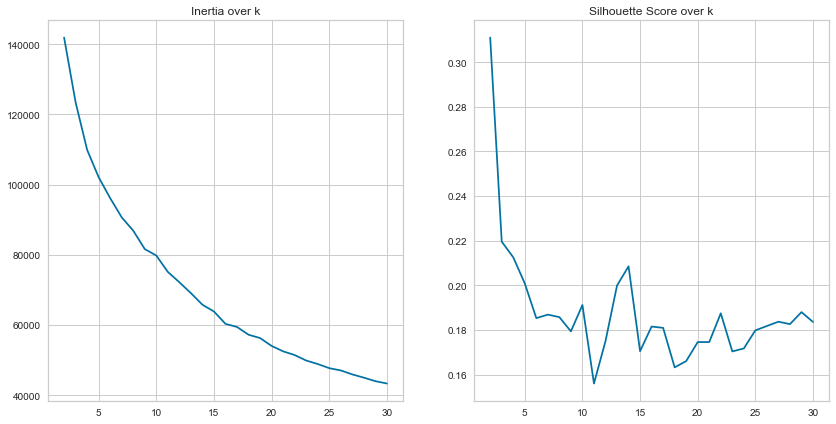

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k');

In [146]:
# group is the largest cluster by far
df['cluster'].value_counts()

3    3036
1    1345
0     981
2     308
Name: cluster, dtype: int64

In [147]:
km_10 = KMeans(n_clusters=10, random_state=42)
km_10.fit(X_sc)

KMeans(n_clusters=10, random_state=42)

In [148]:
df['clusterx10'] = km_10.labels_

In [149]:
df['clusterx10'].value_counts()

4    1479
1     851
2     746
0     660
5     650
7     633
6     349
3     300
9       1
8       1
Name: clusterx10, dtype: int64

<AxesSubplot:>

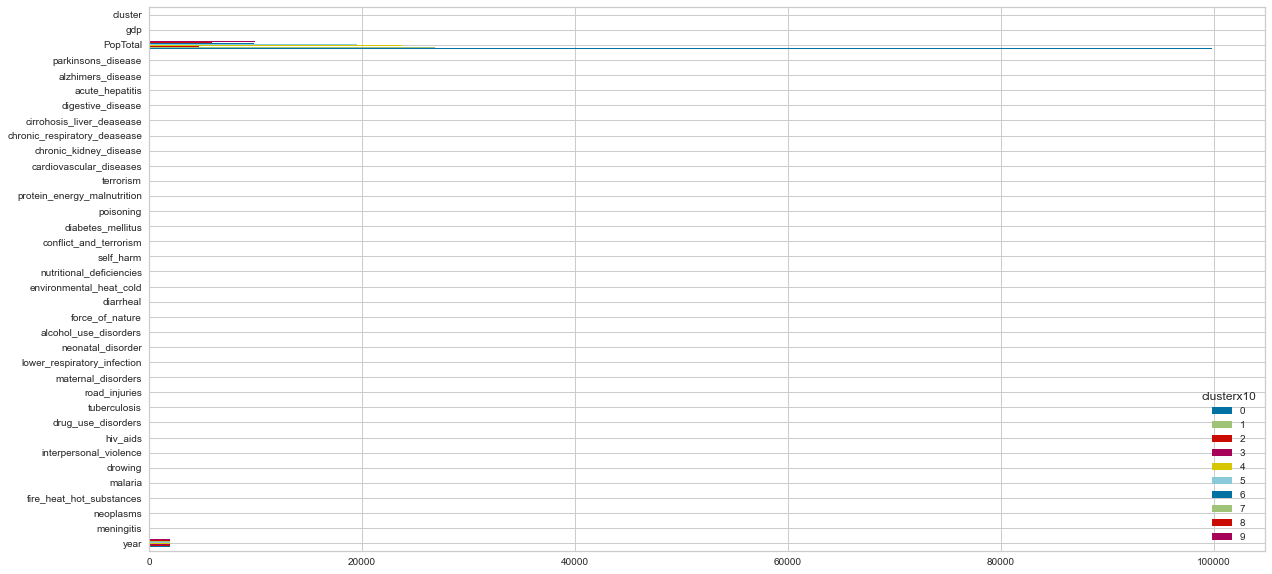

In [150]:
df.groupby(by='clusterx10').mean().T.plot(kind='barh')

<AxesSubplot:>

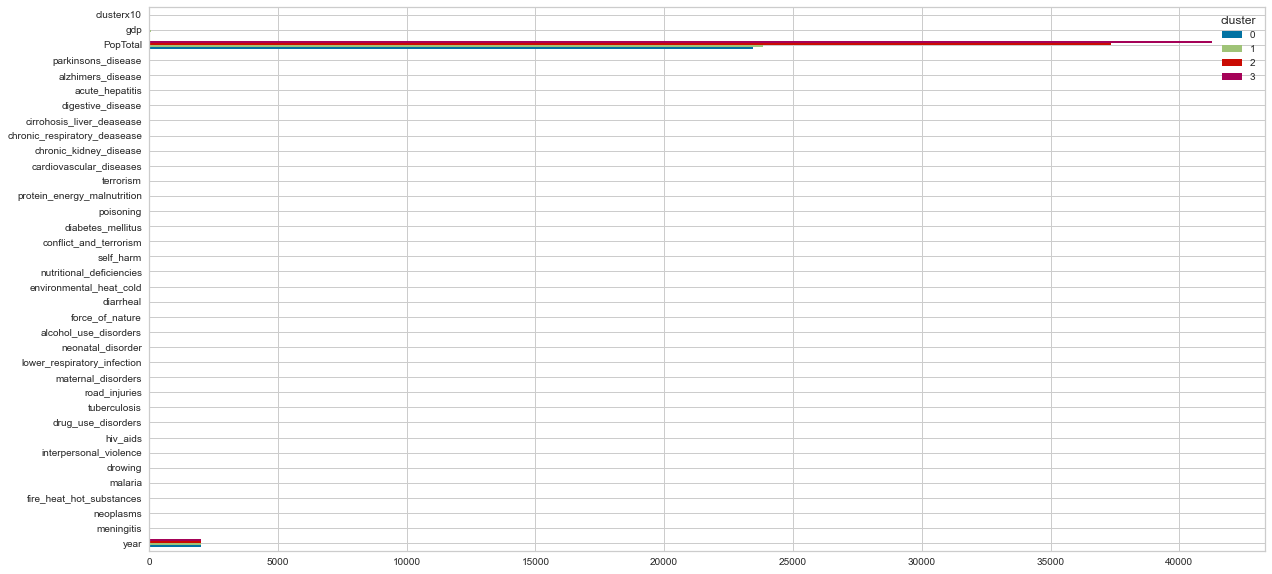

In [151]:
df.groupby('cluster').mean().T.plot(kind='barh')



# Hierarchical Clustering

In [179]:
h_df = X_sc.copy()

In [180]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [181]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(h_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(h_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6557711655044641.
Cophenetic correlation for Euclidean distance and complete linkage is 0.749258953618259.
Cophenetic correlation for Euclidean distance and average linkage is 0.8727052477455776.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6751969893007785.
Cophenetic correlation for Chebyshev distance and single linkage is 0.6319134696563787.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.7678135083204287.
Cophenetic correlation for Chebyshev distance and average linkage is 0.80330802166172.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.7525350696049301.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6601095428309917.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6345500882759453.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7927505732503065.
Cophenetic corre

In [182]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8727052477455776, which is obtained with Euclidean distance and average linkage.


In [183]:
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(h_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(h_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6557711655044641.
Cophenetic correlation for complete linkage is 0.749258953618259.
Cophenetic correlation for average linkage is 0.8727052477455776.
Cophenetic correlation for centroid linkage is 0.8784949864096436.
Cophenetic correlation for ward linkage is 0.4044307925924535.
Cophenetic correlation for weighted linkage is 0.6751969893007785.


In [184]:
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8784949864096436, which is obtained with centroid linkage.


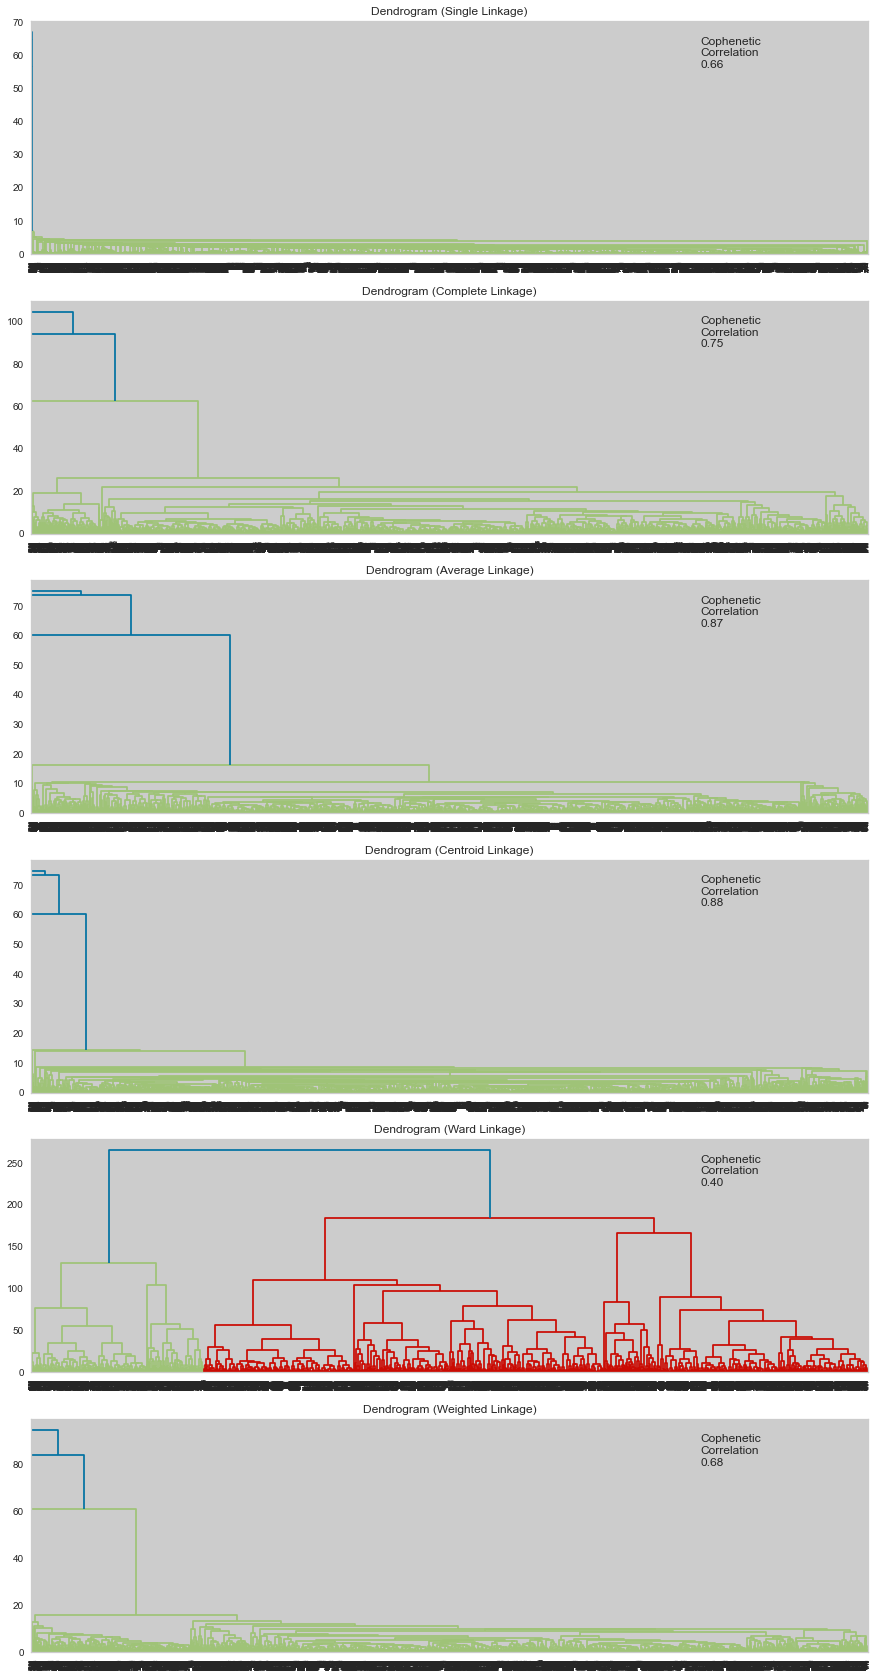

In [185]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))


# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(h_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(h_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [188]:
df_hc = pd.DataFrame(compare, columns = compare_cols)
df_hc = df_hc.sort_values(by = 'Cophenetic Coefficient')

In [189]:
df_hc

,Linkage,Cophenetic Coefficient
4,ward,0.404431
0,single,0.655771
5,weighted,0.675197
1,complete,0.749259
2,average,0.872705
3,centroid,0.878495


In [190]:
from sklearn.cluster import AgglomerativeClustering

In [193]:


H_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
H_model.fit(h_df)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [194]:
h_df = pd.DataFrame(h_df, columns = X.columns)

In [195]:
h_df['hc_segments'] = H_model.labels_
df['hc_segments'] = H_model.labels_

h_df['km_labels'] = km.labels_
df['km_labels'] = km.labels_

<AxesSubplot:xlabel='hc_segments'>

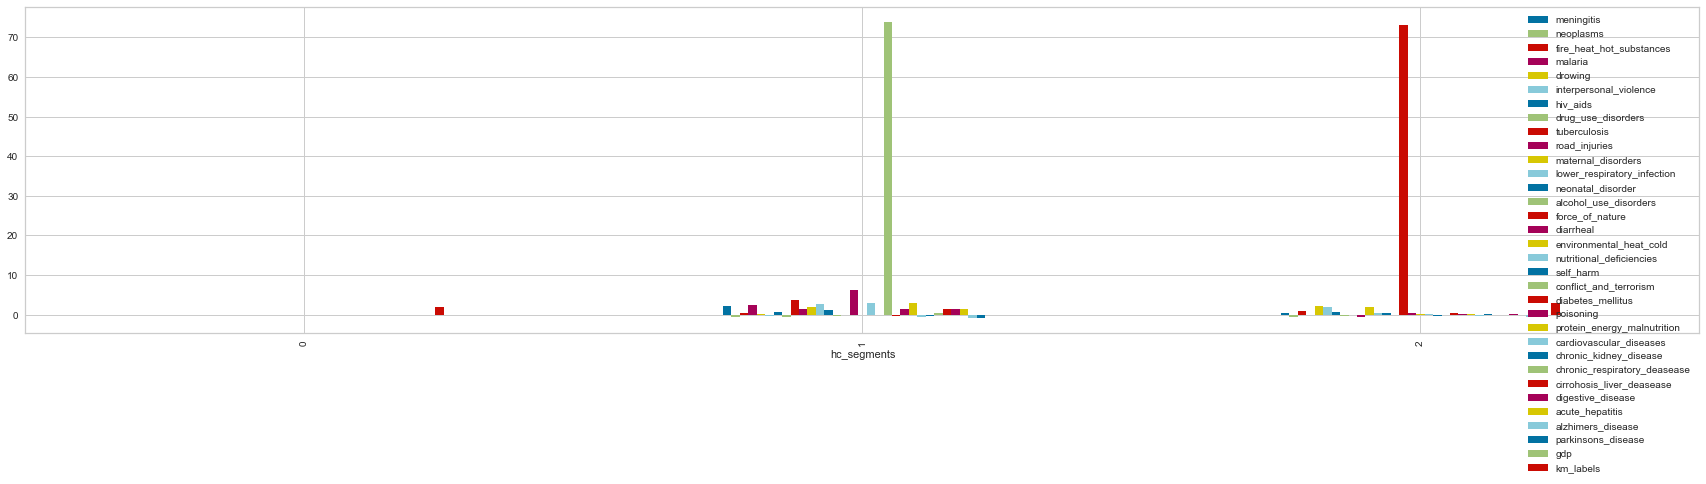

In [196]:
h_df.groupby("hc_segments").mean().plot.bar(figsize=(30, 6))

<AxesSubplot:xlabel='km_labels'>

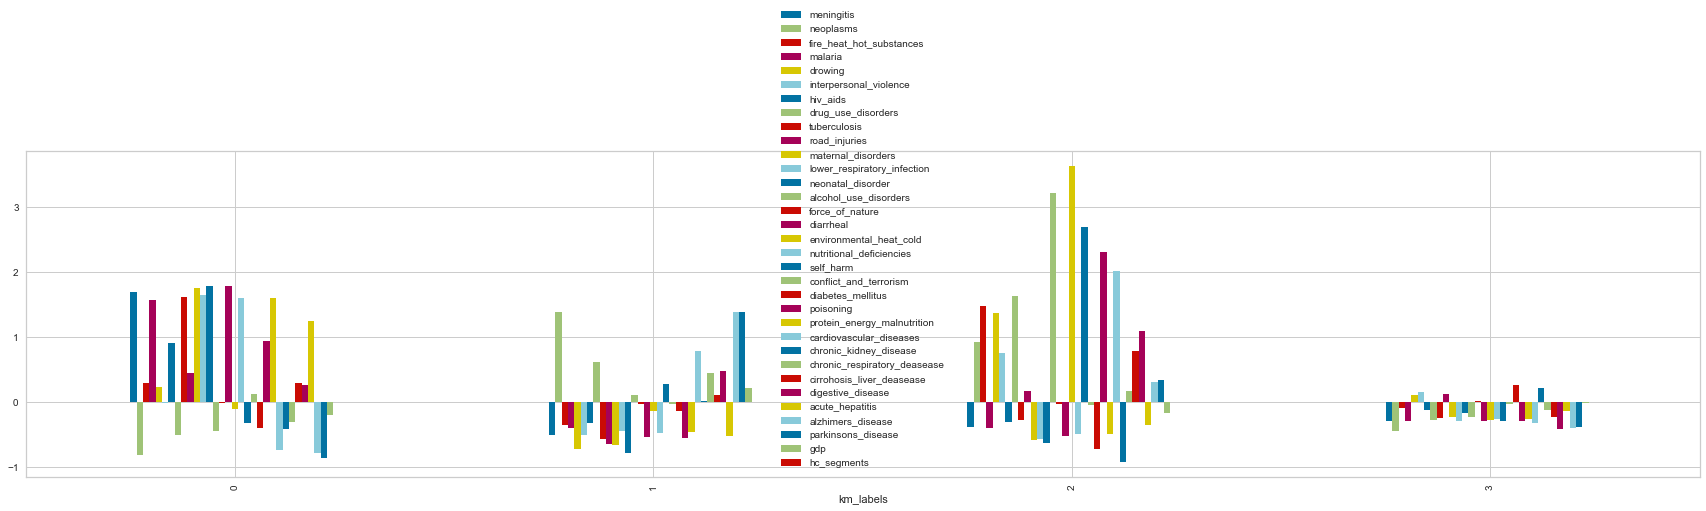

In [197]:
h_df.groupby("km_labels").mean().plot.bar(figsize=(30, 6))

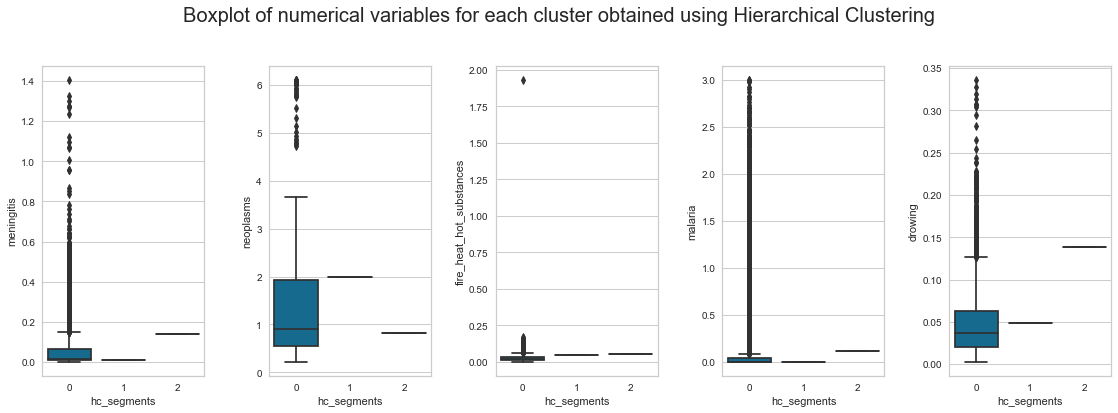

In [198]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=X[X.columns[counter]], x=h_df["hc_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)
plt.savefig('HI_CL.jpg', dpi = 250)

In [199]:
col = ['drug_use_disorders','tuberculosis', 'road_injuries', 'maternal_disorders','lower_respiratory_infection', 'neonatal_disorder', 'hc_segments']

In [200]:
df.hc_segments.value_counts()

0    5668
2       1
1       1
Name: hc_segments, dtype: int64

In [201]:
df[df.hc_segments == 1]

,country,code,year,number_of_executions,meningitis,neoplasms,fire_heat_hot_substances,malaria,drowing,interpersonal_violence,...,acute_hepatitis,alzhimers_disease,parkinsons_disease,PopTotal,gdp,continent,cluster,clusterx10,hc_segments,km_labels
4301,Rwanda,RWA,1994,NaN,0.329853,0.640682,0.034786,1.430114,0.053161,0.054121,...,0.041946,0.040598,0.013308,5936.253,0.091415,Africa,0,8,1,0


In [202]:
df.cluster.value_counts()

3    3036
1    1345
0     981
2     308
Name: cluster, dtype: int64

-------------------------

In [253]:
a = pd.read_csv('datasets/cluster.csv')

In [254]:
a.cluster.value_counts()

Excelient    3036
good         1345
fair          981
bad           308
Name: cluster, dtype: int64

In [257]:
a[a['cluster']=='bad']['country'].value_counts().head()

Russia        60
Kazakhstan    48
Belarus       30
Greenland     30
Lithuania     30
Name: country, dtype: int64